This notebook is part of the ``deepcell-tf`` documentation: https://deepcell.readthedocs.io/.

# Cytoplasm segmentation

In [1]:
import os
import numpy as np

import tensorflow as tf

from tensorflow.python.keras import backend as K

from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from deepcell.applications import CytoplasmSegmentation
from deepcell.datasets.cytoplasm import hela_s3

ImportError: cannot import name 'compute_overlap'

## Download cytoplasm data

We can select the `X_test` data to use as raw input for predictions.

In [2]:
((X_train, y_train),(X_test, y_test)) = hela_s3.load_data()

In [3]:
im = X_test
im.shape

(331, 512, 512, 1)

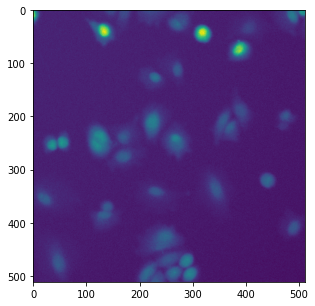

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))
i = 327
ax.imshow(im[i, ..., 0])
plt.show()

## Cytoplasm Segmentation

### Initialize cytoplasm model

The application will download pretrained weights for cytoplasm segmentation. For more information about application objects, please see our [documentation](https://deepcell.readthedocs.io/en/master/API/deepcell.applications.html).

In [5]:
app = CytoplasmSegmentation()

## Use the application to generate labeled images

Typically, neural networks perform best on test data that is similar to the training data. In the realm of biological imaging, the most common difference between datasets is the resolution of the data measured in microns per pixel. The training resolution of the model can be identified using `app.model_mpp`.

In [6]:
print('Training Resolution:', app.model_mpp, 'microns per pixel')

Training Resolution: 0.65 microns per pixel


The resolution of the input data can be specified in `app.predict` using the `image_mpp` option. The `Application` will rescale the input data to match the training resolution and then rescale to the original size before returning the labeled image.

In [7]:
labeled_im = app.predict(im, image_mpp=0.65)
labeled_im.shape

(331, 512, 512, 1)

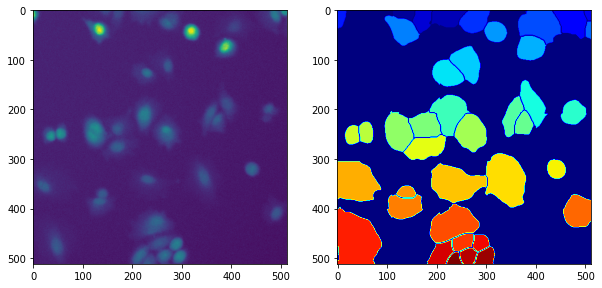

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
ax[0].imshow(im[i, ..., 0])
ax[1].imshow(labeled_im[i, ..., 0], cmap='jet')
plt.show()